# Logistical Regression

This notebook employs logistic regression to examine how various factors influence diabetes diagnosis outcomes. We aim to construct a predictive model to discern patterns and correlations within the data, providing insights into the critical determinants of diabetes presence.

## Importing necessary modules

In [1]:
# Import necessary libraries and packages
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, precision_score, recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import model_selection

In [2]:
# To load the data into a dataframe
diabetes_data = pd.read_csv('cleaned_diabetes_data.csv')
diabetes_data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


## Encoding features

In [3]:
diabetes_data['class'] = diabetes_data['class'].replace({'Positive': 1, 'Negative': 0})
X = diabetes_data.drop(['class'],axis =1)
y = diabetes_data['class']

objectList = X.select_dtypes(include = "object").columns
print(objectList)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feature in objectList:
    X[feature] = le.fit_transform(X[feature].astype(str))
X.to_csv('random.csv',index=False)
print(X)

Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')
     Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
0     40       1         0           1                   0         1   
1     58       1         0           0                   0         1   
2     41       1         1           0                   0         1   
3     45       1         0           0                   1         1   
4     60       1         1           1                   1         1   
..   ...     ...       ...         ...                 ...       ...   
515   39       0         1           1                   1         0   
516   48       0         1           1                   1         1   
517   58       0         1           1                   1         1   


C:\Users\ryano\AppData\Local\Temp\ipykernel_4488\2835426287.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  diabetes_data['class'] = diabetes_data['class'].replace({'Positive': 1, 'Negative': 0})


In [4]:
# Splitting the data into training and test sets
X_train_fresh, X_test_fresh, y_train_fresh, y_test_fresh = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
from sklearn.linear_model import LogisticRegression
logi = LogisticRegression(random_state = 42, penalty = 'l2', max_iter =1000)
logi.fit(X_train_fresh, y_train_fresh)

LogisticRegression(max_iter=1000, random_state=42)

In [6]:
kfold = model_selection.KFold(n_splits=10)
scoring = 'accuracy'
acc_logi = cross_val_score(estimator = logi, X = X_train_fresh, y = y_train_fresh, cv = kfold,scoring=scoring)
acc_logi.mean()

0.9123123123123122

## Evaluation metrics

In [7]:
# Predict the target value for test data
y_predict = logi.predict(X_test_fresh)
# Evaluate model's performance metrics
acc = accuracy_score(y_test_fresh, y_predict)
roc = roc_auc_score(y_test_fresh, y_predict)
prec = precision_score(y_test_fresh, y_predict)
rec = recall_score(y_test_fresh, y_predict)
f1 = f1_score(y_test_fresh, y_predict)
cr = classification_report(y_test_fresh, y_predict)

results = pd.DataFrame([['Logistic Regression',acc, acc_logi.mean(), prec, rec, f1,roc]], columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.935897,0.912312,0.95098,0.95098,0.95098,0.929194


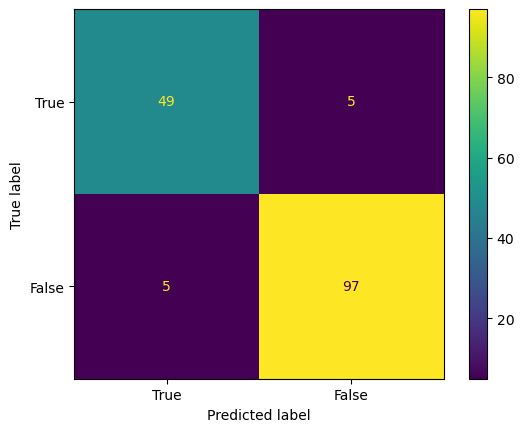

In [8]:
# Visualisation of the confusion matrix 
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test_fresh, y_predict)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['True', 'False'])

cm_display.plot()
plt.show()

## Conclusion
This model is ideal for binary classification tasks, such as predicting a specific medical condition.

In our analysis, the Logistic Regression model achieved an accuracy of 93.6% in the test dataset. The model's consistency and reliability were further affirmed by a cross-validation accuracy of 91.2%, indicating stable performance across different subsets of the data.

The precision and recall of the model were observed to be 95.1% and 95.1%, respectively, suggesting that the model is highly reliable in predicting both classes. Additionally, the F1 Score and ROC Score, standing at 95.1% and 93.0% respectively, further validate the model's accuracy and its discriminative power in effectively distinguishing between the classes.

Our model demonstrates robustness and reliability, making it a valuable tool for clinicians in assessing and diagnosing the specified medical condition with high confidence.